![logo_ironhack_blue 7](ironhack.png)

# LAB 3.08 - Multiclass classification. Logistic Regression. 

In this study we are going to use the Linear Model from Sklearn library to perform Multi class Logistic Regression. We are going to use handwritten digit's dataset from Sklearn. [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)



# Introduction
When the target variable has more than two categories, multi-class regression is used for classification. For e.g. mail classification as (primary, social, promotions, forums). We are going to use One Vs Rest (OVR) algorithm.
 
This is also called as one vs all algorithm. As the name suggests, with this algorithm, we choose one class and put all other classes into second virtual class and run the binary logistic regression on it. We repeat this procedure for all the classes in the dataset. So we actually end up with binary classifiers designed to recognize each class in a dataset.
 
For prediction on given data, our algorithm returns probabilities for each class in the dataset and whichever class has the highest probability is our prediction.

# Problem Statement
The data set contains images of hand-written digits: 10 classes where each class refers to a digit(0 to 9). **The objective** of our model is to predict the correct digit from 0 to 9, based on given handwritten image of digit.

# Questions

1. Load the data
```python
    from sklearn import datasets
    digits_df = datasets.load_digits()
```    
2. Understand and explore the dataset
     - What's in the field "data" of the dataset ?
     - What's in the filed "images of our" dataset ?
     - Can you identify the model features and the model target for training ?
3. Visualize the dataset. Hint: Use matplotlib.pyplot.matshow on images.
4. Build the Machine Learning Model
    -  Create the feature array X and the target vector y.
    -  Create the Test And Train Datasets.
    -  Apply multi-class Logistic Regression Using OVR (Use sklearn.linear_model.LogisticRegression with parameters multi_class='ovr', solver='liblinear') and **train the model** (model.fit(X_train, y_train)).
5. Test the model
    - Predict the value of digit 200 from test data. Use Use matplotlib.pyplot.matshow to show the image of the digit 200.
    - What is the score of the model developed ?
    - Show and plot the confusion matrix ? What do the different elements in the matrix mean? Why it is useful ?
    - Calculate and describe the performance metrics by creating a classification report from the confussion matrix.

    

# Import Libraries
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It's plotting library, and we are going to use it for data visualization
* datasets: Here we are going to use 'load_digits' dataset
* model_selection: Here we are going to use model_selection.train_test_split() for splitting the data
* linear_model: Here we are going to linear_model.LogisticRegression() for classification
* metrics: Here we are going use metrics.plot_confusion_matrix() and metrics.classification_report() for model analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

#### 1. Load the data

In [3]:
from sklearn import datasets
digits_df = datasets.load_digits()

#### 2. Understand and explore the dataset

##### 2.1. What's in the field "data" of the dataset ?

In [23]:
df = pd.DataFrame(digits_df.data)

In [11]:
digits_df.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

##### 2.2. What's in the filed "images of our" dataset ?

In [40]:
digits_df.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

##### Can you identify the model features and the model target for training ?

In [45]:
digits_df.target

array([0, 1, 2, ..., 8, 9, 8])

#### 3. Visualize the dataset. Hint: Use matplotlib.pyplot.matshow on images.

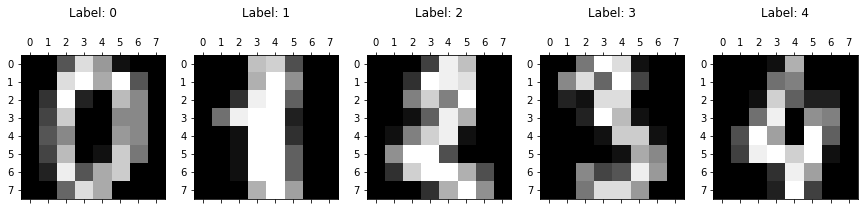

In [15]:
rows = 1
columns = 5
fig, ax =  plt.subplots(rows, columns, figsize = (15,6))
plt.gray()
for i in range(columns):
  ax[i].matshow(digits_df.images[i])
  ax[i].set_title('Label: %s\n' % digits_df.target_names[i])
plt.show()

#### 4. Build the Machine Learning Model

##### Create the feature array X and the target vector y.

In [16]:
X = digits_df.data
y = digits_df.target

##### Create the Test And Train Datasets.

In [18]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (1078, 64)
X_test dimension=  (719, 64)
y_train dimension=  (1078,)
y_train dimension=  (719,)


##### Apply multi-class Logistic Regression Using OVR (Use sklearn.linear_model.LogisticRegression with parameters multi_class='ovr', solver='liblinear') and train the model (model.fit(X_train, y_train)).

In [20]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

#### 5. Test de model

##### Predict the value of digit 200 from test data. Use Use matplotlib.pyplot.matshow to show the image of the digit 200.

In [37]:
X_test[200]

array([ 0.,  0.,  3., 13., 15.,  5.,  0.,  0.,  0.,  1., 15., 13., 10.,
       15.,  0.,  0.,  0.,  2., 16.,  3.,  2.,  9.,  0.,  0.,  0.,  0.,
       12., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
        0.,  0.,  1., 16.,  4.,  9., 11.,  1.,  0.,  0.,  0., 15.,  3.,
        0.,  8.,  8.,  0.,  0.,  0.,  3., 12., 15., 12.,  7.,  0.])

In [36]:
lm.predict([X_test[200]])

array([8])

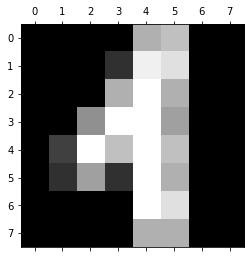

In [41]:
plt.matshow(digits_df.images[200]) 
plt.show() 

##### What is the score of the model developed ?

In [42]:
lm.score(X_test, y_test)

0.9624478442280946

##### Show and plot the confusion matrix ? What do the different elements in the matrix mean? Why it is useful ?

C:\Users\CG921YH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[82,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  2, 71,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 69,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 74,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0, 71,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 75,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62,  1,  0],
       [ 0,  3,  0,  1,  0,  1,  0,  0, 56,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1,  4, 62]], dtype=int64)

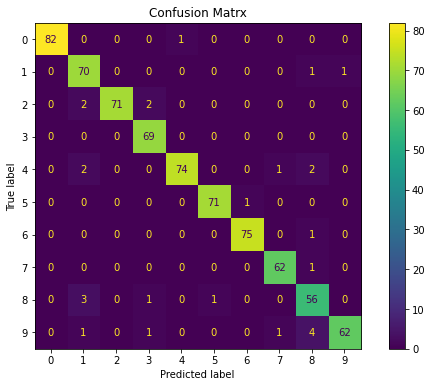

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, X_test, y_test, display_labels= digits_df.target_names, ax = ax)
disp.confusion_matrix

##### Calculate and describe the performance metrics by creating a classification report from the confussion matrix.

In [44]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.90      0.97      0.93        72
           2       1.00      0.95      0.97        75
           3       0.95      1.00      0.97        69
           4       0.99      0.94      0.96        79
           5       0.99      0.99      0.99        72
           6       0.99      0.99      0.99        76
           7       0.97      0.98      0.98        63
           8       0.86      0.92      0.89        61
           9       0.98      0.90      0.94        69

    accuracy                           0.96       719
   macro avg       0.96      0.96      0.96       719
weighted avg       0.96      0.96      0.96       719

